# Skewness and symmetry
By Evgenia "Jenny" Nitishinskaya and Delaney Granizo-Mackenzie

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

Notebook released under the Creative Commons Attribution 4.0 License.

---

Skewness and symmetry, like mean and variance, are ways of describing distributions. A distribution is <i>symmetric</i> if the parts on either side of the mean are mirror images of each other. For example, the normal distribution is symmetric. The normal distribution with mean $\mu$ and standard deviation $\sigma$ is defined as
$$ f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$
We can plot it to confirm that it is symmetric:

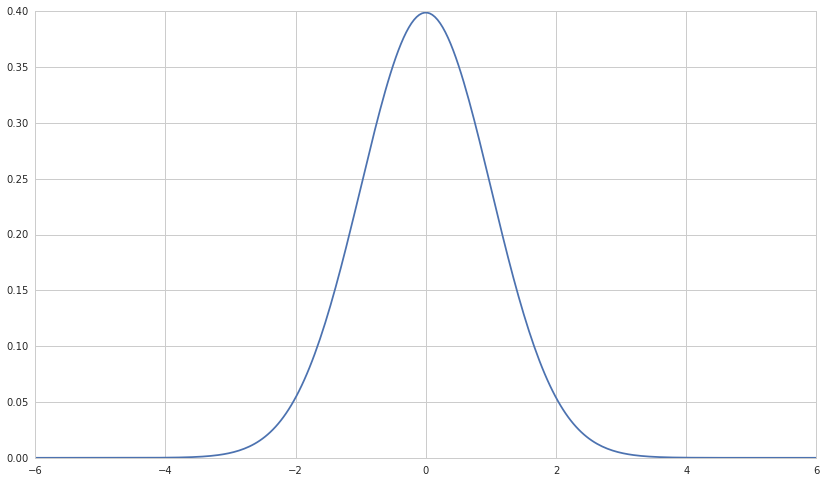

In [227]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Plot a normal distribution with mean = 0 and standard deviation = 2
xs = np.linspace(-6,6, 300)
normal = stats.norm.pdf(xs)
plt.plot(xs, normal);

A distribution which is not symmetric is called <i>skewed</i>. For instance, a distribution can have many small positive and a few large negative values (negatively skewed) or vice versa (positively skewed), and still have a mean of 0. A symmetric distribution has skewness 0. Positively skewed unimodal (one mode) distributions have the property that mean > median > mode. Negatively skewed unimodal distributions are the reverse, with mean < median < mode. All three are equal for a symmetric unimodal distribution.

The explicit formula for skewness is
$$ S_K = \frac{n}{(n-1)(n-2)} \frac{\sum_{i=1}^n (X_i - \mu)^3}{\sigma^3} $$

where $n$ is the number of observations, $\mu$ is the arithmetic mean, and $\sigma$ is the standard deviation. The sign of this quantity describes the direction of the skew as described above. We can plot a positively skewed and a negatively skewed distribution to see what they look like.

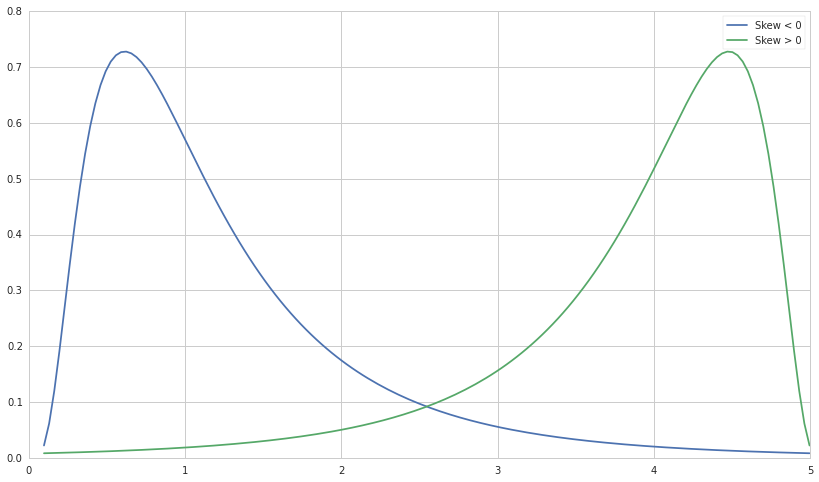

In [229]:
# Generate x-values for which we will plot the distribution
xs2 = np.linspace(stats.lognorm.ppf(0.01, .7, loc=-.1), stats.lognorm.ppf(0.99, .7, loc=-.1), 150)

# Negatively skewed distribution
lognormal = stats.lognorm.pdf(xs2, .7)
plt.plot(xs2, lognormal, label='Skew < 0')

# Positively skewed distribution
plt.plot(xs2, lognormal[::-1], label='Skew > 0')
plt.legend();

Although skew is less obvious when graphing discrete data sets, we can still compute it. For example, below are the skew, mean, and median for S&P 500 returns 2012-2014. Note that the skew is negative, and so the mean is less than the median.

Skew: -0.191239433061
Mean: 0.000660588304069
Median: 0.000728187475175


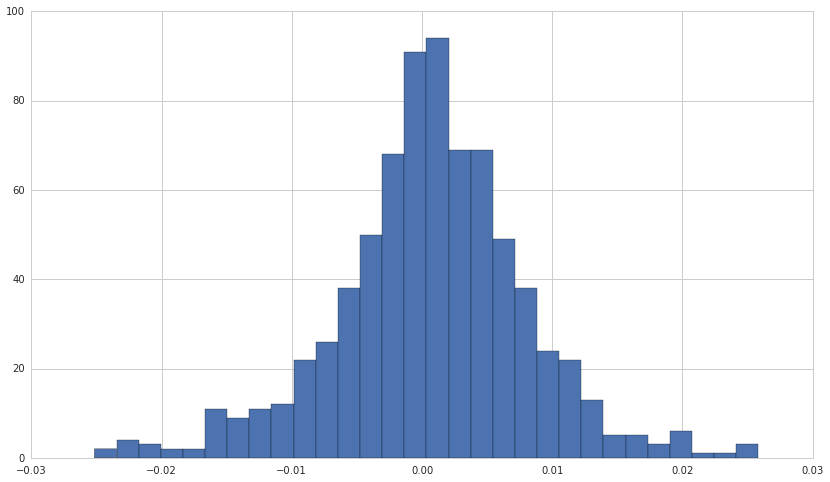

In [226]:
start = '2012-01-01'
end = '2015-01-01'
pricing = get_pricing('SPY', fields='price', start_date=start, end_date=end)
returns = pricing.pct_change()[1:]

print 'Skew:', stats.skew(returns)
print 'Mean:', np.mean(returns)
print 'Median:', np.median(returns)

plt.hist(returns, 30);

# Kurtosis

Kurtosis attempts to measure the shape of the deviation from the mean. It's measured relative to a normal distribution, which is called mesokurtic. All normal distributions, regardless of mean and variance, have a kurtosis of 3. A leptokurtic distribution (kurtosis > 3) is highly peaked and has fat tails, while a platykurtic distribution (kurtosis < 3) is broad. Sometimes, however, kurtosis in excess of the normal distribution (kurtosis - 3) is used, and this is the default in `scipy`.

Excess kurtosis of leptokurtic distribution: 3.0
Excess kurtosis of mesokurtic distribution: 0.0
Excess kurtosis of platykurtic distribution: -0.593762875598


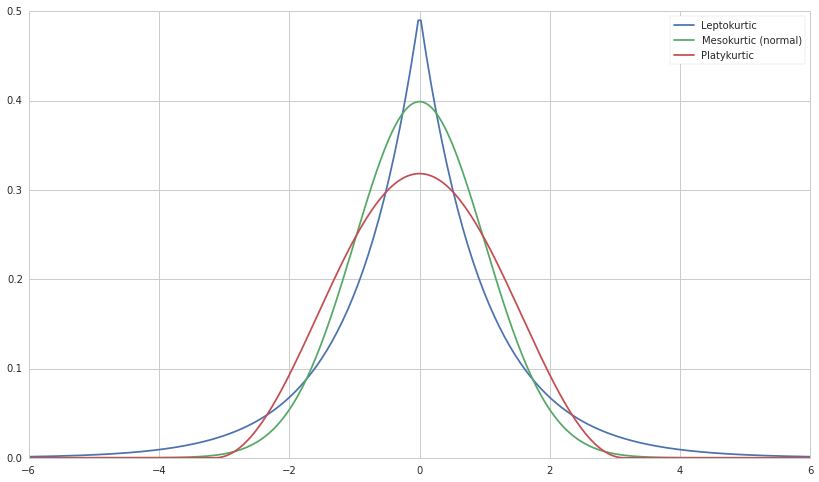

In [202]:
# Plot some example distributions
plt.plot(xs,stats.laplace.pdf(xs), label='Leptokurtic')
print 'Excess kurtosis of leptokurtic distribution:', (stats.laplace.stats(moments='k'))
plt.plot(xs, normal, label='Mesokurtic (normal)')
print 'Excess kurtosis of mesokurtic distribution:', (stats.norm.stats(moments='k'))
plt.plot(xs,stats.cosine.pdf(xs), label='Platykurtic')
print 'Excess kurtosis of platykurtic distribution:', (stats.cosine.stats(moments='k'))
plt.legend();

The formula for kurtosis is
$$ K = \left ( \frac{n(n+1)}{(n-1)(n-2)(n-3)} \frac{\sum_{i=1}^n (X_i - \mu)^4}{\sigma^4} \right ) $$

while excess kurtosis is given by
$$ K_E = \left ( \frac{n(n+1)}{(n-1)(n-2)(n-3)} \frac{\sum_{i=1}^n (X_i - \mu)^4}{\sigma^4} \right ) - \frac{3(n-1)^2}{(n-2)(n-3)} $$

For a large number of samples, the excess kurtosis becomes approximately

$$ K_E \approx \frac{1}{n} \frac{\sum_{i=1}^n (X_i - \mu)^4}{\sigma^4} - 3 $$

Since above we were considering perfect, continuous distributions, this was the form that kurtosis took. However, for a set of samples drawn for the normal distribution, we would use the first definition, and (excess) kurtosis would only be approximately 0.

We can use `scipy` to find the excess kurtosis of the S&P 500 returns from before.

In [223]:
print stats.kurtosis(returns)

1.19009703212


The histogram of the returns shows significant observations beyond 3 standard deviations away from the mean, so we shouldn't be surprised that the kurtosis is indicating a leptokurtic distribution.

# Other standardized moments

It's no coincidence that the variance, skewness, and kurtosis take similar forms. They are the first and most important standardized moments, of which the $k$th has the form
$$ \frac{E[(X - E[X])^k]}{\sigma^k} $$

The first standardized moment is always 0 $(E[X - E[X]] = E[X] - E[E[X]] = 0)$, so we only care about the second through fourth. All of the standardized moments are dimensionless numbers which describe the distribution, and in particular can be used to quantify how close to normal (having standardized moments $0, \sigma, 0, \sigma^2$) a distribution is. One method is the Jarque-Bera test, which we can run on the S&P 500 returns to find the p-value for them coming from a normal distribution.

In [228]:
from statsmodels.stats.stattools import jarque_bera
print jarque_bera(returns)[1]

2.25876596801e-11


This tells us that the S&P 500 returns do not follow a normal distribution.